In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [8]:
import pandas as pd

df = pd.read_csv('MSFT_data.csv')

df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9271,2022-12-23,234.405426
9272,2022-12-27,232.667511
9273,2022-12-28,230.281494
9274,2022-12-29,236.644135


In [9]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9271,2022-12-23,234.405426
9272,2022-12-27,232.667511
9273,2022-12-28,230.281494
9274,2022-12-29,236.644135


In [10]:
df['Date']

,Date
0,1986-03-13
1,1986-03-17
2,1986-03-18
3,1986-03-19
4,1986-03-20
...,...
9271,2022-12-23
9272,2022-12-27
9273,2022-12-28
9274,2022-12-29


In [11]:
import datetime
#spremenim stringe v stevilke
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [12]:
df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9271,2022-12-23,234.405426
9272,2022-12-27,232.667511
9273,2022-12-28,230.281494
9274,2022-12-29,236.644135


In [13]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,1986-03-13
1,1986-03-17
2,1986-03-18
3,1986-03-19
4,1986-03-20
...,...
9271,2022-12-23
9272,2022-12-27
9273,2022-12-28
9274,2022-12-29


In [14]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.059707
1986-03-17,0.062906
1986-03-18,0.061306
1986-03-19,0.060240
1986-03-20,0.058641
...,...
2022-12-23,234.405426
2022-12-27,232.667511
2022-12-28,230.281494


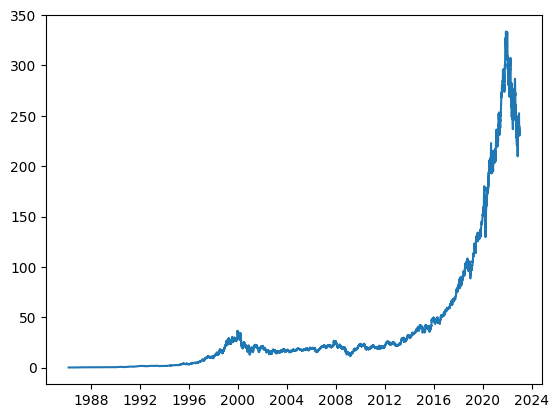

In [15]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [18]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.180038,229.717422,227.667618,224.650833
1,2021-03-26,229.717422,227.667618,224.650833,228.653824
2,2021-03-29,227.667618,224.650833,228.653824,227.454865
3,2021-03-30,224.650833,228.653824,227.454865,224.177063
4,2021-03-31,228.653824,227.454865,224.177063,227.967346
...,...,...,...,...,...
247,2022-03-17,269.468597,279.908539,286.965942,287.775024
248,2022-03-18,279.908539,286.965942,287.775024,292.853638
249,2022-03-21,286.965942,287.775024,292.853638,291.615631
250,2022-03-22,287.775024,292.853638,291.615631,296.392029


In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

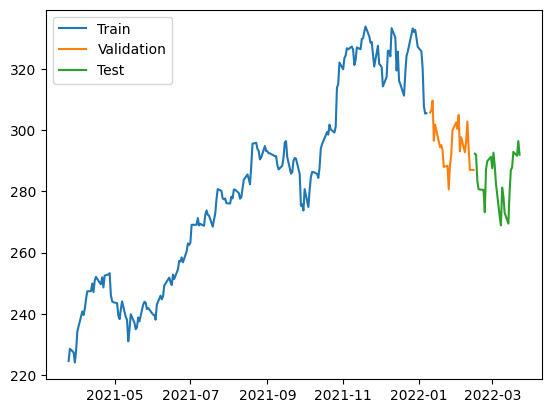

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 81597.2109 - mean_absolute_error: 284.0028 - val_loss: 87252.2812 - val_mean_absolute_error: 295.3001
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78890.8672 - mean_absolute_error: 279.1859 - val_loss: 86922.2500 - val_mean_absolute_error: 294.7408
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 78556.1562 - mean_absolute_error: 278.6328 - val_loss: 86538.5469 - val_mean_absolute_error: 294.0891
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78006.9531 - mean_absolute_error: 277.5703 - val_loss: 86127.9609 - val_mean_absolute_error: 293.3902
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78572.1719 - mean_absolute_error: 278.5763 - val_loss: 85636.2266 - val_mean_absolute_error: 292.5510
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 77771.9766 - mean_absolute_error: 277.0480 - val_loss: 84899.6094 - val_mean_absolute_error: 291.2892
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


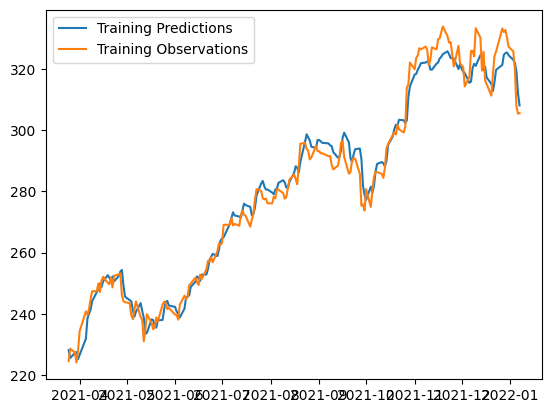

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


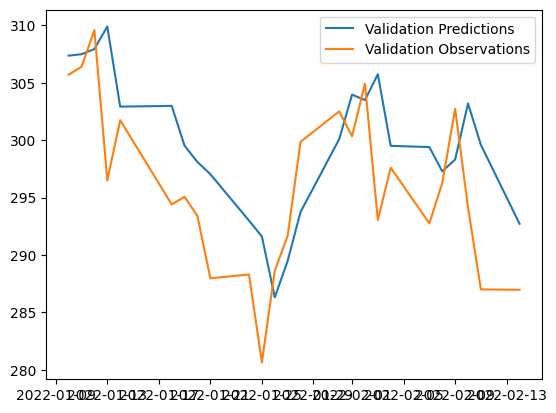

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


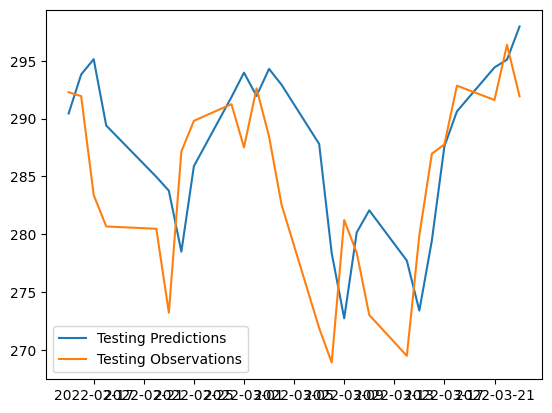

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

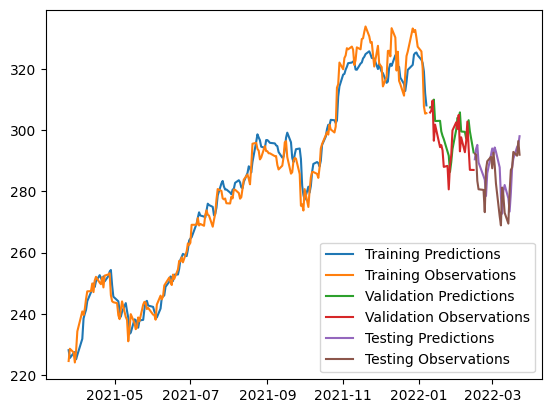

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [26]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

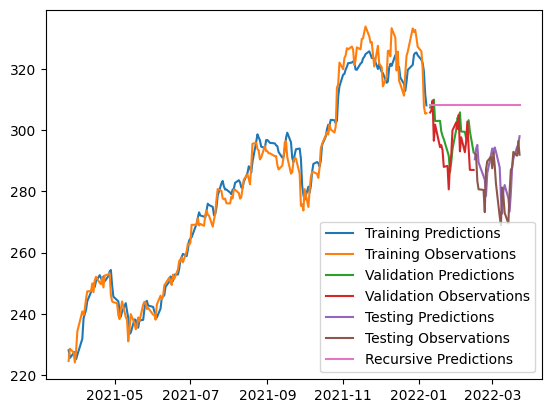

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [28]:
import numpy as np
#may 18,2022
#prava cena 254.08
# Zadnje tri cene delnice (vstavi dejanske vrednosti)
last_3_values = np.array([261.12, 261.50, 266.82])  # Te vrednosti so samo primer

# Preoblikujemo podatke v obliko, ki jo model pričakuje: (1, 3, 1)
# To pomeni: 1 primer, 3 mesečne cene, 1 značilnost (cena delnice)
last_3_values = last_3_values.reshape((1, 3, 1))

# Napoved prihodnje cene (napovedujemo naslednji mesec)
predicted_value = model.predict(last_3_values)

# Izpišemo napovedano ceno
print(f"Napovedana cena delnice v naslednjem mesecu je: {predicted_value[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Napovedana cena delnice v naslednjem mesecu je: 267.187255859375
